In [1]:
import pandas as pd
from glob import glob
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [2]:
# The path to the new_data folder
csv_folder_path = "../new_data/"

# Fetch all the csv files from the folder
csv_files = glob(csv_folder_path + "*.csv")

# Initialize lists to hold training and test data
train_data = []
test_data = []

# Process each CSV file
for file in csv_files:
    df = pd.read_csv(file)
    
    # Drop the 'timestamp' attribute
    df = df.drop(columns=['timestamp'])
    
    # Get 2200 rows from the start
    start_df = df.head(2200)
    
    # Get 2200 rows from the end
    end_df = df.tail(2200)
    
    # Get 2200 rows from the middle
    middle_index = len(df) // 2
    middle_df = df.iloc[middle_index - 1100: middle_index + 1100]
    
    # Combine the start, middle, and end data for training
    train_df = pd.concat([start_df, middle_df, end_df])
    
    # Get the rows from position 4000 to 5400 for testing
    test_df = df.iloc[4000:5400]
    
    # Append to the lists
    train_data.append(train_df)
    test_data.append(test_df)

# Concatenate all training and test data
train_data = pd.concat(train_data, ignore_index=True)
test_data = pd.concat(test_data, ignore_index=True)

# Separate the input data from the output data (label)
x_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
x_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

# Creation and training of the Gaussian Naive Bayes Classifier
model = GaussianNB()
model.fit(x_train, y_train)

# Predictions with the usage of the training data set
y_pred = model.predict(x_test)

# Predict the label for 10 random records
num_samples = 10

# Get 10 random indices from the x_test data set
random_indices = np.random.randint(0, len(x_test), size=num_samples)

for i, random_index in enumerate(random_indices):
    random_sample = x_test[random_index].reshape(1, -1)  # Reshape to match model's expected input shape
    actual_label = y_test[random_index]
    
    # Make the prediction
    predicted_label = model.predict(random_sample)
    
    # Display the random sample and the label prediction
    print(f'\nSample {i+1}:')
    print(f'Random Sample Index: {random_index}')
    print(f'Input Features: {random_sample}')
    print(f'Actual Label: {actual_label}')
    print(f'Predicted Label: {predicted_label}')



Sample 1:
Random Sample Index: 838
Input Features: [[-0.8626  0.0269  0.3421 -1.2536 -0.1563 -0.131 ]]
Actual Label: 11
Predicted Label: [2]

Sample 2:
Random Sample Index: 3591
Input Features: [[-1.1133 -0.353  -0.3408 -1.0037  0.5967 -0.8828]]
Actual Label: 0
Predicted Label: [0]

Sample 3:
Random Sample Index: 5312
Input Features: [[-0.9902 -0.0725  0.1736 -0.1472  0.075   0.9729]]
Actual Label: 6
Predicted Label: [6]

Sample 4:
Random Sample Index: 26730
Input Features: [[-0.781  -0.0173 -0.3655 -0.9998 -0.1143 -0.1257]]
Actual Label: 0
Predicted Label: [5]

Sample 5:
Random Sample Index: 1739
Input Features: [[-0.9757 -0.0398 -0.2505 -0.271   0.2672  0.9241]]
Actual Label: 6
Predicted Label: [6]

Sample 6:
Random Sample Index: 1543
Input Features: [[-0.9841 -0.0024 -0.1743 -0.1765  0.3159  0.9419]]
Actual Label: 6
Predicted Label: [6]

Sample 7:
Random Sample Index: 6370
Input Features: [[-0.935  -0.0175  0.0861 -1.0985 -0.0374 -0.013 ]]
Actual Label: 0
Predicted Label: [5]

Samp

In [3]:
from evaluation import general_evaluation

general_evaluation(y_test,y_pred)

Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.51      0.55      6670
           1       0.74      0.72      0.73      2223
           2       0.15      0.13      0.14       983
           3       0.01      0.00      0.01       245
           4       0.00      0.00      0.00       571
           5       0.46      0.94      0.62      2233
           6       0.94      0.93      0.93     15174
           7       0.00      0.00      0.00         0
           8       0.53      0.43      0.48      2373
           9       0.42      0.11      0.18       221
          10       0.02      0.04      0.03        95
          11       0.00      0.00      0.00        12

    accuracy                           0.73     30800
   macro avg       0.32      0.32      0.31     30800
weighted avg       0.73      0.73      0.72     30800

Confusion Matrix:
[[ 3422   468   548     8     0  1569   545     1   103     1     5     0]


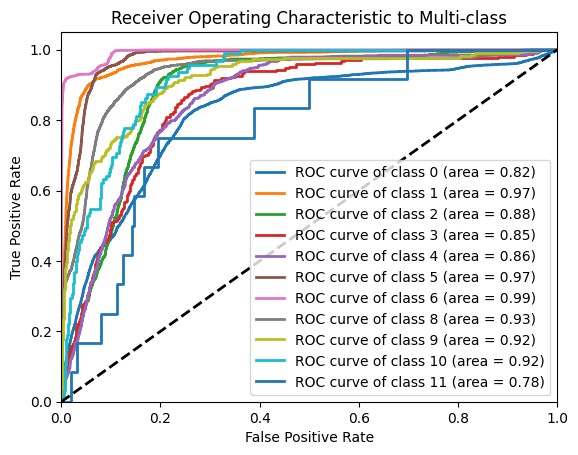

In [4]:
from evaluation import get_roc_curve

get_roc_curve(model,x_test,y_test)